In [1]:
import sys
sys.path.append('/Users/mariana/Documents/projects/Graphs/egnn')

In [2]:
import os
import json
import matplotlib.pyplot as plt

In [5]:
path = '/Users/mariana/Documents/projects/Graphs/EGNN_VAE/'

In [3]:

# c10 = 'nodes_10_community/exp_1/output.json'
c30_base_pth = 'nodes_30_community/exp_1/output.json'
c30_coord_pth = 'nodes_30_community/coord/output.json'
c30_hid15_pth = 'nodes_30_community/hid15/output.json'
c30_both_pth = 'nodes_30_community/hid15_coord/output.json'

c30_base = json.load(open(os.path.join(path, c30_base_pth), 'r'))
c30_coord = json.load(open(os.path.join(path, c30_coord_pth), 'r'))
c30_hid15 = json.load(open(os.path.join(path, c30_hid15_pth), 'r'))
c30_both = json.load(open(os.path.join(path, c30_both_pth), 'r'))

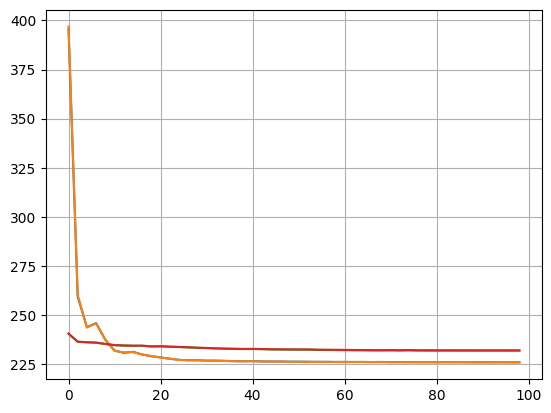

In [6]:
plt.plot(c30_base['train']['epoch'], c30_base['train']['loss'])
plt.plot(c30_base['val']['epoch'], c30_base['val']['loss'])

plt.plot(c30_coord['train']['epoch'], c30_coord['train']['loss'])
plt.plot(c30_coord['val']['epoch'], c30_coord['val']['loss'])

plt.grid()
plt.show()

In [18]:
c10_coord3 = 'nodes_10_community/coord_dim3_2/output.json'
c10_nocoord3 = 'nodes_10_community/NOcoord_dim3_2/output.json'

In [19]:
c10_coord3 = json.load(open(os.path.join(path, c10_coord3), 'r'))
c10_nocoord3 = json.load(open(os.path.join(path, c10_nocoord3), 'r'))

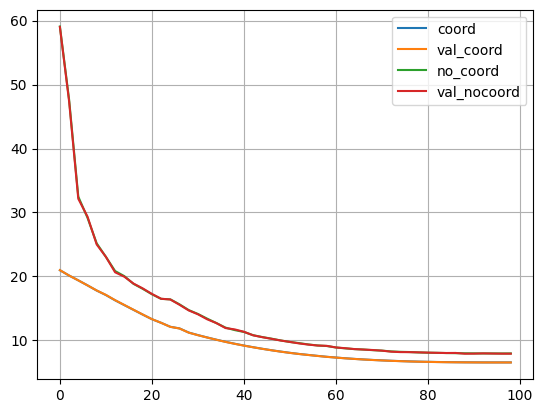

In [20]:
plt.plot(c10_coord3['train']['epoch'], c10_coord3['train']['loss'], label='coord')
plt.plot(c10_coord3['val']['epoch'], c10_coord3['val']['loss'], label='val_coord')

plt.plot(c10_nocoord3['train']['epoch'], c10_nocoord3['train']['loss'], label='no_coord')
plt.plot(c10_nocoord3['val']['epoch'], c10_nocoord3['val']['loss'], label='val_nocoord')

plt.legend()
plt.grid()
plt.show()